### <b>Random Forest Classifier - Ensemble</b>
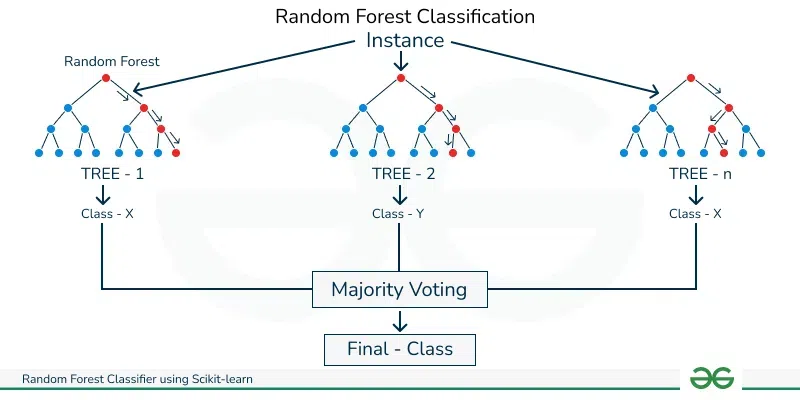
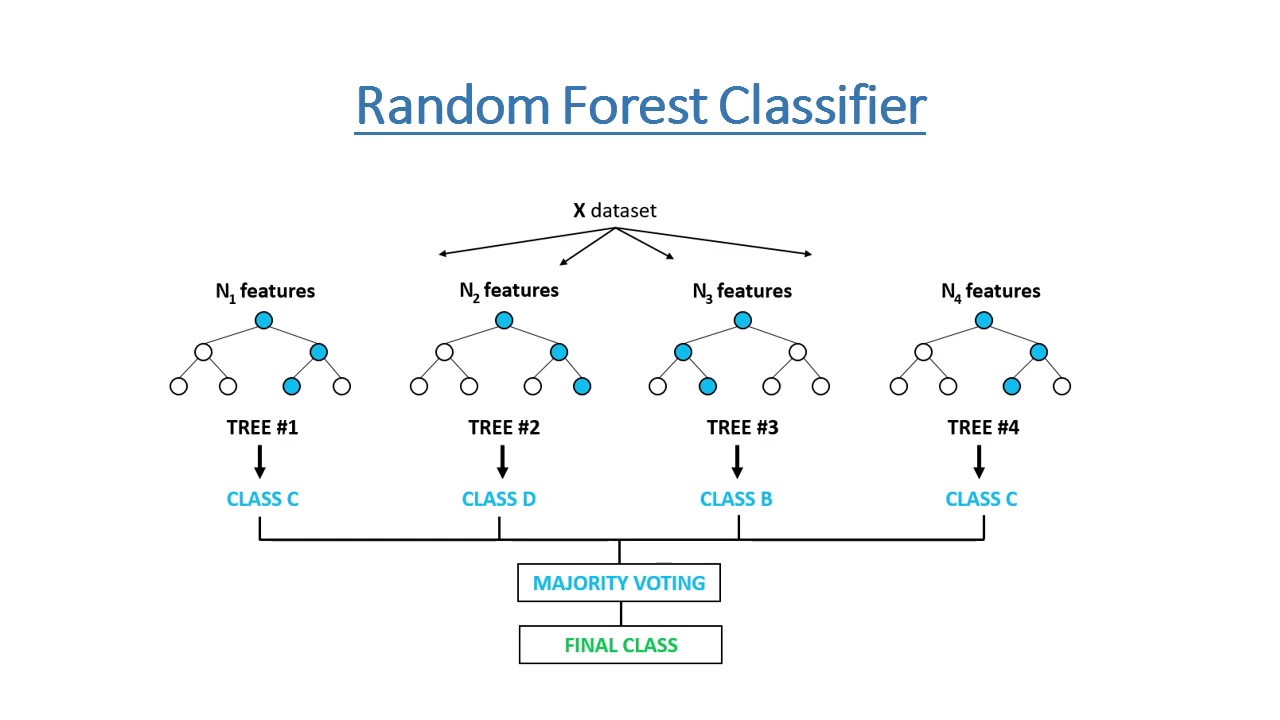

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [29]:
dataset = pd.read_csv("Social_Network_Ads.csv")

print(dataset)

description = dataset.describe()

print(f"Description: \n{description}\n")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]
Description: 
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000



In [39]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

print(f"X_train: \n{X_train}\n")
print(f"X_test: \n{X_test}\n")

X_train: 
[[ 0.27017699  0.03870744]
 [ 0.96719379 -0.57709278]
 [-0.0285445   2.23799396]
 [-0.22769216  0.15600272]
 [ 0.27017699 -0.3131784 ]
 [-0.22769216 -0.28385458]
 [-0.22769216 -0.66506424]
 [ 0.46932465  0.273298  ]
 [ 0.6684723  -0.89965481]
 [-1.82087342 -1.42748357]
 [-0.0285445   2.17934632]
 [-0.7255613   1.91543194]
 [-1.12385661  0.30262183]
 [ 1.46506293 -1.42748357]
 [-0.42683981 -1.13424537]
 [-1.72129959  0.47856475]
 [-1.62172576 -1.57410267]
 [ 0.96719379 -0.6064166 ]
 [-0.0285445   0.1266789 ]
 [-0.22769216  0.21465036]
 [-0.52641364  1.38760318]
 [-0.92470896  0.56653621]
 [ 0.36975082  0.06803126]
 [-1.12385661 -1.60342649]
 [-0.62598747  0.18532654]
 [ 1.46506293  2.35528924]
 [-1.22343044 -1.07559773]
 [-0.22769216  0.273298  ]
 [-1.82087342 -1.31018829]
 [ 1.86335825  1.8567843 ]
 [ 0.56889848  1.8567843 ]
 [-1.52215193 -1.25154065]
 [ 0.17060316  0.09735508]
 [ 0.27017699  0.15600272]
 [-0.82513513  0.15600272]
 [ 0.86761996 -0.84100717]
 [-0.32726598  1.2

In [41]:
random_forest_classifier = RandomForestClassifier(random_state=0)
random_forest_classifier.fit(X_train, y_train)

prediction = random_forest_classifier.predict(standard_scaler.fit_transform(
    [
        [27, 84000]
    ]
))

print(f"1. Prediction for (27 Age, 84000 Salary): {prediction}\n")

y_predicted = random_forest_classifier.predict(X_test)

print(f"2. y_predicted: \n{y_predicted}\n")

confusion_matrix_result = confusion_matrix(y_true = y_test, y_pred = y_predicted)

print(f"3. Confusion matrix: \n{confusion_matrix_result}\n")

accuracy_score_result = accuracy_score(y_true = y_test, y_pred = y_predicted)

print(f"4. Accuracy score: {accuracy_score_result}\n")

classification_report_result = classification_report(y_true = y_test, y_pred = y_predicted)

print(f"5. Classification report: \n{classification_report_result}\n")

1. Prediction for (27 Age, 84000 Salary): [1]

2. y_predicted: 
[0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0]

3. Confusion matrix: 
[[55  4]
 [ 5 36]]

4. Accuracy score: 0.91

5. Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        59
           1       0.90      0.88      0.89        41

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100




C:\Users\PanCh\AppData\Local\Temp\ipykernel_1556\642432233.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


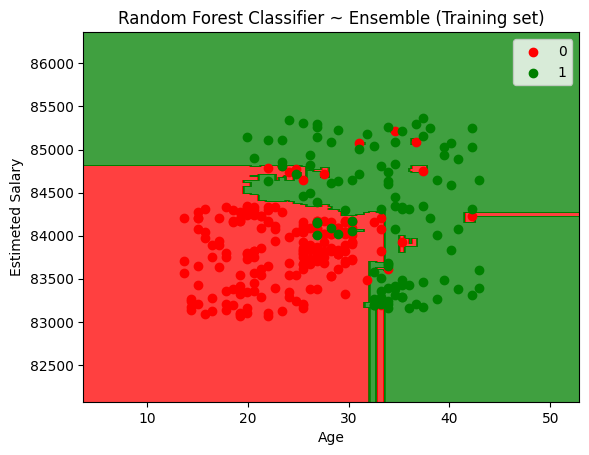

In [33]:
X_set, y_set = standard_scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -10, stop = X_set[:, 0].max()+10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, random_forest_classifier.predict(standard_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title("Random Forest Classifier ~ Ensemble (Training set)")
plt.xlabel('Age')
plt.ylabel('Estimeted Salary')
plt.legend()
plt.show()

C:\Users\PanCh\AppData\Local\Temp\ipykernel_1556\3610813291.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


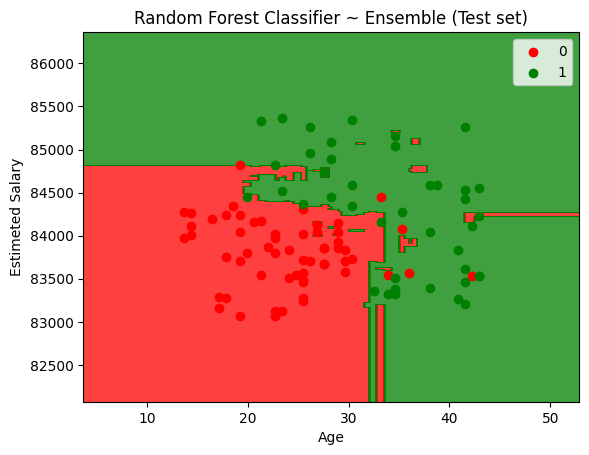

In [34]:
X_set, y_set = standard_scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -10, stop = X_set[:, 0].max()+10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, random_forest_classifier.predict(standard_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title("Random Forest Classifier ~ Ensemble (Test set)")
plt.xlabel('Age')
plt.ylabel('Estimeted Salary')
plt.legend()
plt.show()